## Graphs, `networkx` library

#### Graphs

A **graph** or a **network** -- any model/system with:

+ elements = nodes = vertices
+ relations = edges

Can you think of some examples of graphs and networks around us? And in linguistics?

#### Why do we need graphs?

+ visualization
+ network analysis



The `networkx` library ([documentation](https://networkx.github.io/documentation/latest/index.html)) allows us to work with graphs. Not the only library for working with graphs in python ([some other choices](https://wiki.python.org/moin/PythonGraphLibraries)).

#### Networks

In [ ]:
!pip install networkx

In [1]:
import networkx as nx

#### Creating a graph

In [2]:
G = nx.Graph() # an empty graph
G.add_node(1) # adding a node
G.add_nodes_from([2 ,3, 4, 5, 6, 7]) # adding some nodes

G.remove_node(2) # deleting a node

# labeling nodes, using their ids (1,2,3 etc.)
G.add_node(1, label="node_1")

Adding relations:

In [3]:
G.add_edge(1,3) # an edge between 1 and 3
G.add_edges_from([(1, 4), (1, 5), (3, 5), (4, 5), (1, 6), (1, 7)]) # multiple edges
G.remove_edge(1, 5) # removing an edge

Printing the result:

In [4]:
print('nodes', G.nodes())
print('edges', G.edges())

nodes [1, 3, 4, 5, 6, 7]
edges [(1, 3), (1, 4), (1, 6), (1, 7), (3, 5), (4, 5)]


In [6]:
# the number of neighbors for a node
G.degree(5)

2

In [7]:
# neighbors for each node
for node in G.nodes():
    print (node, G.degree(node))

1 4
3 2
4 2
5 2
6 1
7 1


Weighted graphs, where the relations are weighted:

In [8]:
# adding the weight

G.add_edge(1, 3, weight=4)

We can add the direction of the relation:

In [9]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1,4,0.5), (3,1,0.75)]) # from -- to 

Can you summarize the types of the graphs?

#### Saving the graph

You can use various formats:

+ csv -- for nodes, for relations
+ gml (Graph Modelling Language) -- text format for graphs
+ graphml — XML format for graphs
+ gexf (Graph Exchange XML Format) — XML format with metadata for graphs (the most extensive).

To save your graph:


In [12]:
nx.write_gexf(G, 'graph_file.gexf')

To read a graph:

In [13]:
G1 = nx.read_gexf('graph_file.gexf')

#### Visualization

We will use `matplotlib` ([other options](https://networkx.github.io/documentation/networkx-2.2/reference/drawing.html)).


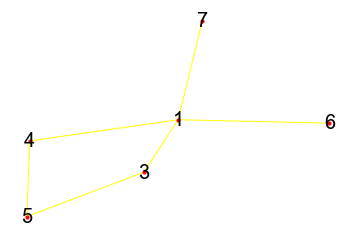

In [12]:
import matplotlib.pyplot as plt 

pos=nx.spring_layout(G)# choosing a layout
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) # color and size of the nodes
nx.draw_networkx_edges(G, pos, edge_color='yellow') # color of edges
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Arial')# adding the labels
plt.axis('off') 
plt.show()

[Layout options](https://networkx.github.io/documentation/latest/reference/drawing.html#layout):

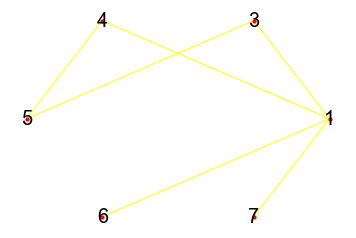

In [20]:
pos=nx.shell_layout(G)# choosing a layout
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) # color and size of the nodes
nx.draw_networkx_edges(G, pos, edge_color='yellow') # color of edges
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Arial')# adding the labels
plt.axis('off') 
plt.show()

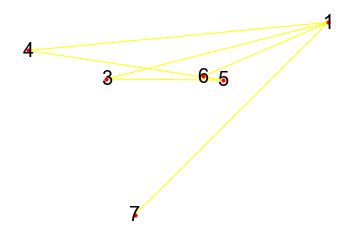

In [21]:
pos=nx.random_layout(G)# choosing a layout
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) # color and size of the nodes
nx.draw_networkx_edges(G, pos, edge_color='yellow') # color of edges
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Arial')# adding the labels
plt.axis('off') 
plt.show()

In [25]:
# to extract a subgraph
sub = [1, 3, 4, 5]
sub_G = G.subgraph(sub)
print(sub_G.number_of_nodes())

4


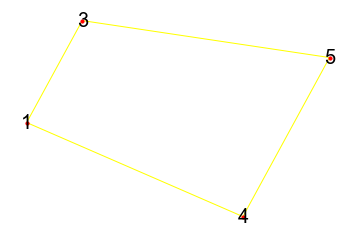

In [27]:
pos=nx.spring_layout(sub_G)# choosing a layout
nx.draw_networkx_nodes(sub_G, pos, node_color='red', node_size=10) # color and size of the nodes
nx.draw_networkx_edges(sub_G, pos, edge_color='yellow') # color of edges
nx.draw_networkx_labels(sub_G, pos, font_size=20, font_family='Arial')# adding the labels
plt.axis('off') 
plt.show()

+ **Radius**

+ **Diameter** 

+ **Assortativity coefficient**

+ **Density** - the number of edges divided by the possible number of edges

+ **Degree** – the number of relations

+ **Weighted degree** – the number of relations of a node divided by the total number of relations in the graph

+ **Centrality**:
    + **degree centrality**: the more relations, the more important the node
    + **closeness centrality**: the more central (closer to other nodes), the more important the node
    + **betweenness centrality**: the number of closest paths that go through the node
    + **eigencentrality**: the more friends your neighbors have, the more important you are

[Relevant documentation](https://networkx.github.io/documentation/networkx-2.2/reference/algorithms/centrality.html).

In [14]:
# centrality (importance)

deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

1
3
4
5
6
7


In [15]:
b = nx.betweenness_centrality(G)
for nodeid in sorted(b, key=b.get, reverse=True):
    print(nodeid)

1
3
4
5
6
7


In [16]:
e = nx.eigenvector_centrality(G)
for nodeid in sorted(b, key=b.get, reverse=True):
    print(nodeid)

1
3
4
5
6
7


**Clustering coefficient** – the probability that the closest neighbors of a node will be connected to each other

In [17]:
print(nx.average_clustering(G))
print(nx.transitivity(G))

0.0
0


**Modularity** shows to what extent the density within communities of a given community structure is higher than the density between communities.

**Community** – sets of nodes densely connected internally.

![](https://focus.ua/files/medvedeva/2016/04/01-11/gofthr.jpg)

In [15]:
from networkx.algorithms import community

[Here](https://networkx.github.io/documentation/latest/reference/algorithms/community.html) you can find algorythms for generating communities:

In [21]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[[1], [3], [4, 5], [6], [7]]

#### Gephi

Gephi is a program that allows you to create, visualize a graph. If you want a beautiful graph, you can process the data in python, upload it to gephi, and create and visualize the graph there.

#### Graphs and linguistics

You can find a list of relevant papers [here](https://www.cs.upc.edu/~rferrericancho/linguistic_and_cognitive_networks.html) 